# CIE_4140_Lecture_18_Part_1_Python #

## Excitation of a rod by a point pulse-load $P_0 Dirac(x) Dirac(t)$ ##

In [1]:
import sympy as sp

In [2]:
u = sp.symbols('u',cls=sp.Function)
x, k= sp.symbols('x, k',real=True)
t = sp.symbols('t',real=True)
c, P_0 = sp.symbols('c P_0')

In [3]:
EM = sp.diff(u(x,t),t,2)-c**2*sp.diff(u(x,t),x,2)-P_0 * sp.DiracDelta(x)*sp.DiracDelta(t)
display(EM)

-P_0*DiracDelta(t)*DiracDelta(x) - c**2*Derivative(u(x, t), (x, 2)) + Derivative(u(x, t), (t, 2))

In [4]:
EM_fourier = sp.fourier_transform(EM,x,k)
display(EM_fourier)

-P_0*DiracDelta(t) - c**2*FourierTransform(Derivative(u(x, t), (x, 2)), x, k) + FourierTransform(Derivative(u(x, t), (t, 2)), x, k)

In [5]:
U = sp.symbols('U',cls=sp.Function)
EM_fourier = EM_fourier.subs(sp.FourierTransform(sp.Derivative(u(x, t), (x, 2)), x, k),-k**2*U(t))
EM_fourier = EM_fourier.subs(sp.FourierTransform(sp.Derivative(u(x, t), (t, 2)), x, k),sp.Derivative(U(t), (t, 2)))
display(EM_fourier)
print(EM_fourier)

-P_0*DiracDelta(t) + c**2*k**2*U(t) + Derivative(U(t), (t, 2))

-P_0*DiracDelta(t) + c**2*k**2*U(t) + Derivative(U(t), (t, 2))


In [6]:
C1, C2 = sp.symbols('C1, C2')
Solution_fourier = sp.dsolve(EM_fourier,U(t)).rhs
display(Solution_fourier)

(C1 - I*P_0*Heaviside(t)/(2*c*k))*exp(I*c*k*t) + (C2 + I*P_0*Heaviside(t)/(2*c*k))*exp(-I*c*k*t)

In [7]:
Solution_fourier = sp.simplify(Solution_fourier.subs([(C1,0),(C2,0)]))
display(Solution_fourier)
Solution_fourier_sub = Solution_fourier.subs([(P_0,1),(c,1)])
display(Solution_fourier_sub)

P_0*sin(c*k*t)*Heaviside(t)/(c*k)

sin(k*t)*Heaviside(t)/k

In [8]:
Solution = sp.integrate(Solution_fourier_sub*sp.cos(k*x),(k,0,1e20))/sp.pi
display(Solution)

(Heaviside(t)*Si(1.0e+20*t - 1.0e+20*x)/2 + Heaviside(t)*Si(1.0e+20*t + 1.0e+20*x)/2)/pi

Result not fully correct, so an arbitrary high value is given, Maple gives limit of k to infinity

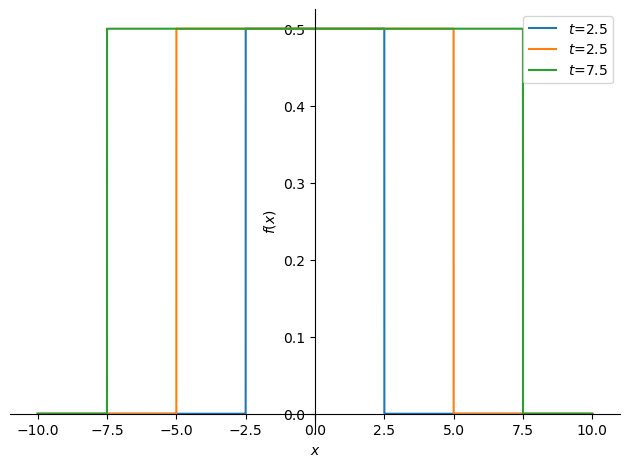

In [9]:
p0 = sp.plotting.plot(Solution.subs(t,2.5),(x,-10,10),label='$t$=2.5' ,legend=True,show=False)
p1 = sp.plotting.plot(Solution.subs(t,5),(x,-10,10),label='$t$=2.5' ,show=False)
p2 = sp.plotting.plot(Solution.subs(t,7.5),(x,-10,10),label='$t$=7.5' ,show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

Excitation of a rod on elastic foundation by a point pulse-load $P_0 DiracDelta(x) DiracDelta(t)$

In [38]:
u = sp.symbols('u',cls=sp.Function)
x, k= sp.symbols('x, k',real=True)
t = sp.symbols('t',real=True)
c, P_0,omega_0 = sp.symbols('c P_0 omega_0')

In [39]:
EM = sp.diff(u(x,t),t,2)-c**2*sp.diff(u(x,t),x,2)+omega_0**2*u(x,t)-P_0*sp.DiracDelta(x)*sp.DiracDelta(t)
display(EM)

-P_0*DiracDelta(t)*DiracDelta(x) - c**2*Derivative(u(x, t), (x, 2)) + omega_0**2*u(x, t) + Derivative(u(x, t), (t, 2))

In [64]:
EM_fourier = sp.fourier_transform(EM,x,k)
display(EM_fourier)

-P_0*DiracDelta(t) - c**2*FourierTransform(Derivative(u(x, t), (x, 2)), x, k) + omega_0**2*FourierTransform(u(x, t), x, k) + FourierTransform(Derivative(u(x, t), (t, 2)), x, k)

In [65]:
U = sp.symbols('U',cls=sp.Function)
EM_fourier = EM_fourier.subs(sp.FourierTransform(u(x, t),x,k),U(t))
EM_fourier = EM_fourier.subs(sp.FourierTransform(sp.Derivative(u(x, t), (x, 2)), x, k),-k**2*U(t))
EM_fourier = EM_fourier.subs(sp.FourierTransform(sp.Derivative(u(x, t), (t, 2)), x, k),sp.Derivative(U(t), (t, 2)))
display(EM_fourier)

-P_0*DiracDelta(t) + c**2*k**2*U(t) + omega_0**2*U(t) + Derivative(U(t), (t, 2))

In [66]:
C1, C2 = sp.symbols('C1, C2')
Solution_fourier = sp.dsolve(EM_fourier,U(t)).rhs
display(Solution_fourier)

(C1 - P_0*Heaviside(t)/(2*sqrt(-c**2*k**2 - omega_0**2)))*exp(-t*sqrt(-c**2*k**2 - omega_0**2)) + (C2 + P_0*Heaviside(t)/(2*sqrt(-c**2*k**2 - omega_0**2)))*exp(t*sqrt(-c**2*k**2 - omega_0**2))

In [67]:
Solution_fourier = sp.simplify(Solution_fourier.subs([(C1,0),(C2,0)]))
display(Solution_fourier)
Solution_fourier_sub = Solution_fourier.subs([(P_0,1),(c,1),(omega_0,sp.sqrt(2))])
display(Solution_fourier_sub)

P_0*sinh(t*sqrt(-c**2*k**2 - omega_0**2))*Heaviside(t)/sqrt(-c**2*k**2 - omega_0**2)

sinh(t*sqrt(-k**2 - 2))*Heaviside(t)/sqrt(-k**2 - 2)

In [52]:
Solution = sp.integrate(Solution_fourier_sub*sp.cos(k*x),(k,0,sp.oo))/sp.pi
display(Solution)

-I*(Integral(-exp(-t*sqrt(-k**2 - 2))*cos(k*x)/sqrt(k**2 + 2), (k, 0, oo)) + Integral(exp(t*sqrt(-k**2 - 2))*cos(k*x)/sqrt(k**2 + 2), (k, 0, oo)))*Heaviside(t)/(2*pi)

Werkt ook niet in Maple

In [78]:
Solution = sp.Heaviside(t)/2*sp.besselj(0,sp.sqrt(2)*sp.sqrt(t**2-x**2))*sp.Heaviside(t**2-x**2)
display(Solution)

Heaviside(t)*Heaviside(t**2 - x**2)*besselj(0, sqrt(2)*sqrt(t**2 - x**2))/2

In [79]:
%matplotlib notebook

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [84]:
Solution_func = sp.lambdify((x,t),Solution)

<IPython.core.display.Javascript object>


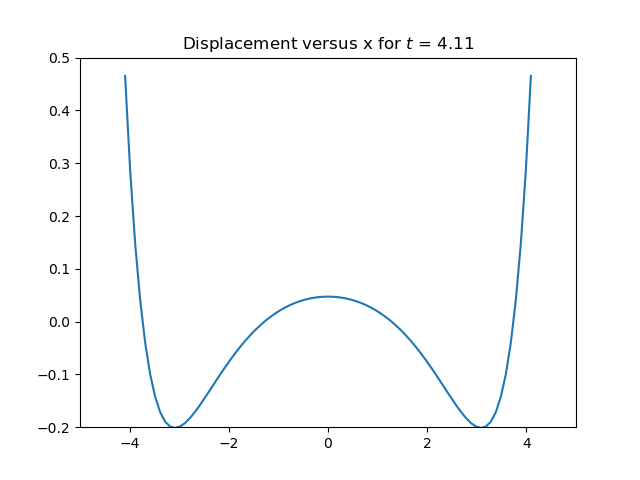

In [88]:
fig, ax = plt.subplots()
xdata = np.linspace(-5,5,100)
line, = ax.plot([], [])
ax.set_xlim(-5,5)
ax.set_ylim(-0.2,0.5)

def update(frame):
    ydata = Solution_func(x=xdata,t=frame)
    ax.set_title("Displacement versus x for $t$ = "+str(np.round(frame,2)))
    line.set_data(xdata, ydata)

ani = FuncAnimation(fig, update, frames=np.linspace(0,4.9,100),interval = 100)
plt.show()